In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# READING DATASET

In [3]:

df= pd.read_csv(r'/kaggle/input/netflix-shows/netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# DATA EXPLORATION

In [4]:
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df.duplicated().sum() #duplicate rows

duplicate rows:  0


In [21]:
df.isna().sum() #missing data

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# CLEANING DATASET

In [7]:
#filling missing data

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [8]:
#droping missing data 

df= df.dropna()

In [9]:
#checking for NaN
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# FIXING DATE COLUMN

In [31]:
df = df.copy()

df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip())
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9,September,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3,March,2016
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,November,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020


# DATA VISUALIZATION

**1. Movie to TV Show ratio**

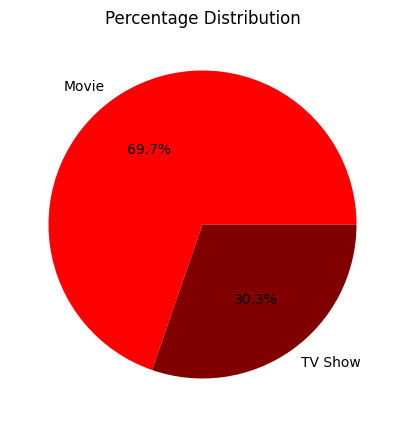

In [64]:
plt.figure(figsize=(15, 5))
types = df['type'].value_counts()

plt.pie(types, labels=types.index, colors=['red','maroon'], autopct='%1.1f%%')
plt.title('Percentage Distribution')
plt.show()

**2. Top content producing countries**

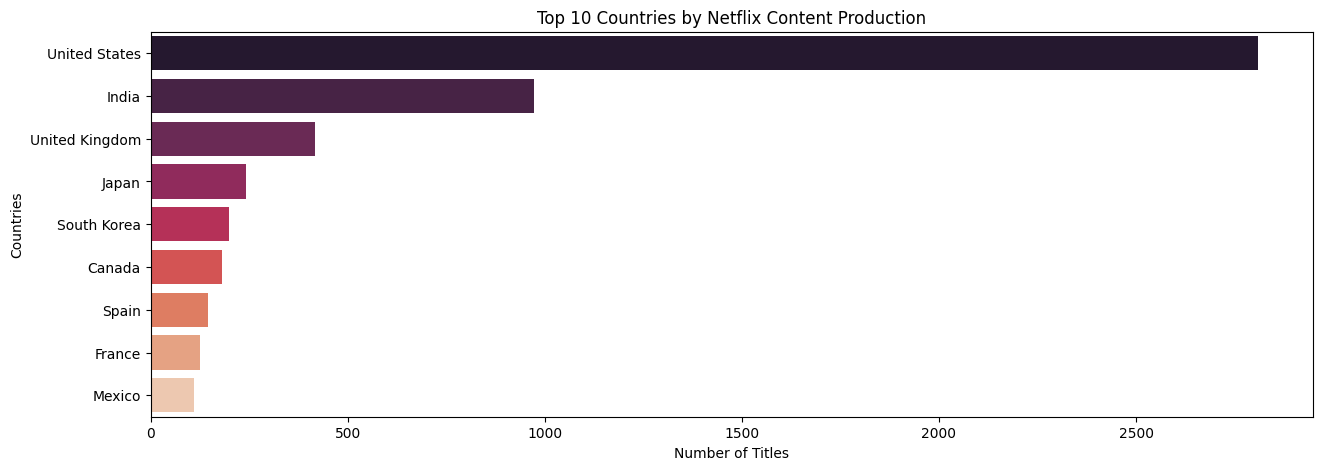

In [11]:
countries = df.country.value_counts().head(10)
countries = countries[countries.index != 'Unknown']

plt.figure(figsize=(15, 5))
sns.barplot(y=countries.index, x=countries.values, palette='rocket')
plt.title('Top 10 Countries by Netflix Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Countries')
plt.show()

**3. Most common genres**

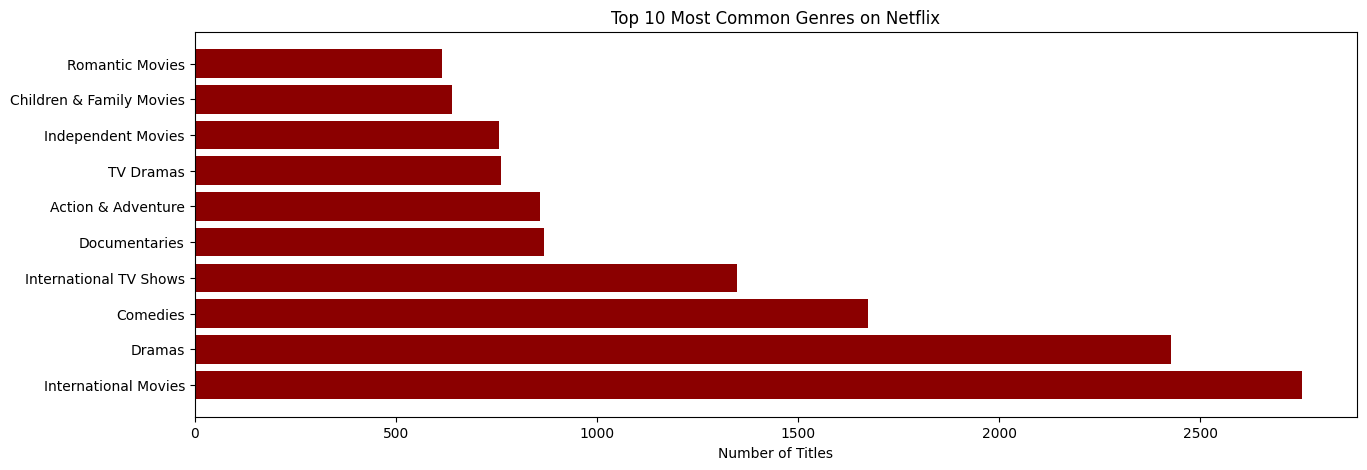

In [67]:
genres = df['listed_in'].str.split(', ')
genre = [genre for sublist in genres for genre in sublist]

gen = pd.Series(genre)
top_genres = gen.value_counts().head(10)

genres_df = top_genres.reset_index()
genres_df.columns = ['Genre', 'Count']

plt.figure(figsize=(15, 5))
plt.barh(genres_df['Genre'], genres_df['Count'], color='darkred')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()

**4. Releases over time**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


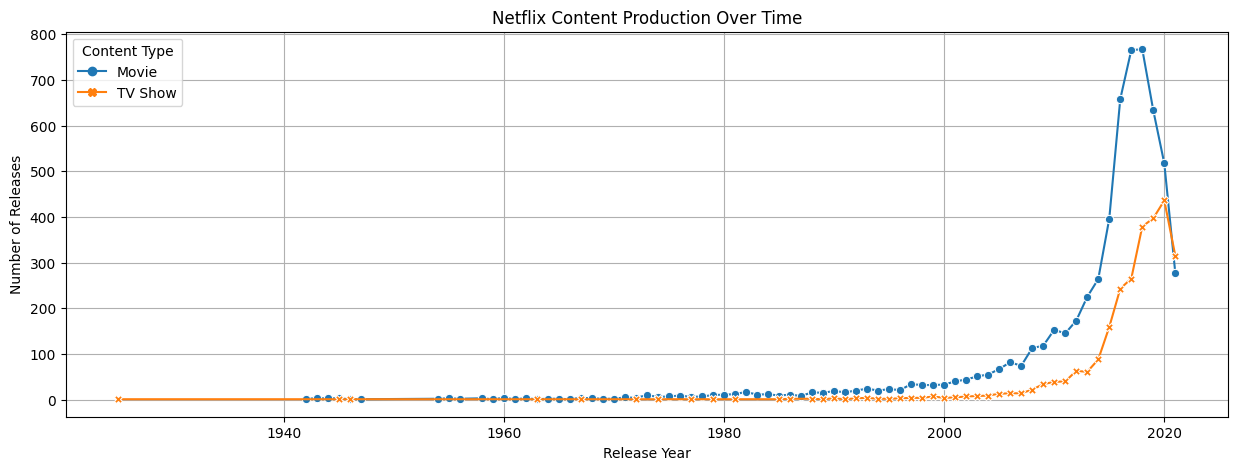


Year with the maximum releases:  2018


In [68]:
t = df.groupby(['release_year', 'type']).size().unstack()
plt.figure(figsize=(15, 5))
sns.lineplot(data=t, dashes=False, markers=True)
plt.title('Netflix Content Production Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

most= t.sum(axis=1).idxmax()
print("\nYear with the maximum releases: ", most)

5. Content rating

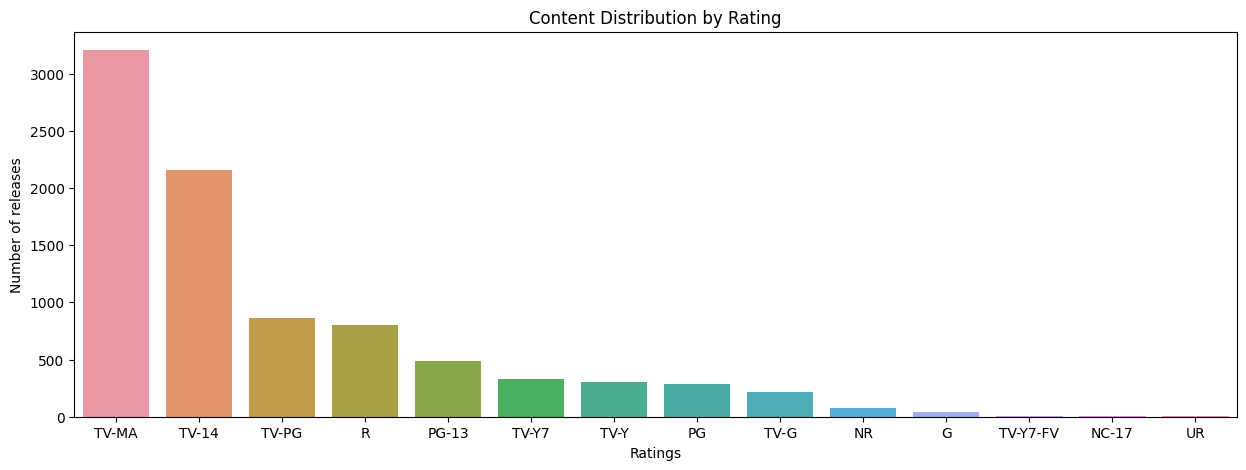


Most contents are  TV-MA  rated.


In [51]:
plt.figure(figsize=(15, 5))
nrating = df['rating'].value_counts()  # Get counts of each rating
rating = nrating.index 
sns.countplot(data=df, x='rating', order=rating)
plt.title('Content Distribution by Rating')
plt.xlabel('Ratings')
plt.ylabel('Number of releases')
plt.show()

print ("\nMost contents are ", nrating.idxmax()," rated." )

6. Duration of movies

/tmp/ipykernel_31/4148549196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


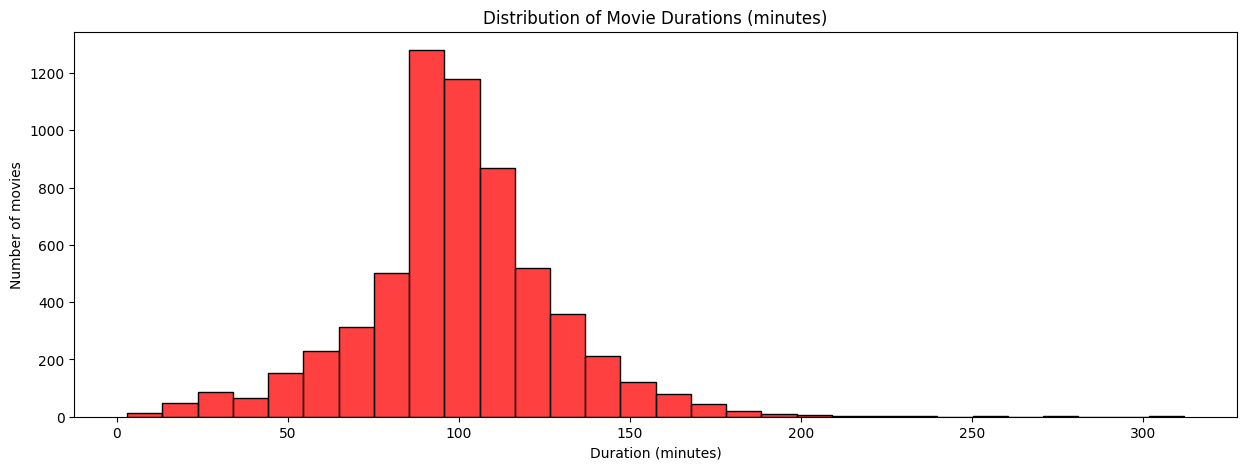


Avg duration of movies in minutes:  100.0


In [53]:
movies = df[df['type'] == 'Movie']
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(15, 5))
sns.histplot(data=movies, x='duration_min', bins=30, color= 'red')
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.show()

print("\nAvg duration of movies in minutes: ", movies['duration_min'].mean().round() )

7. Duration of TV series

/tmp/ipykernel_31/3101658259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['season_count'] = shows['duration'].str.extract('(\d+)').astype(float)


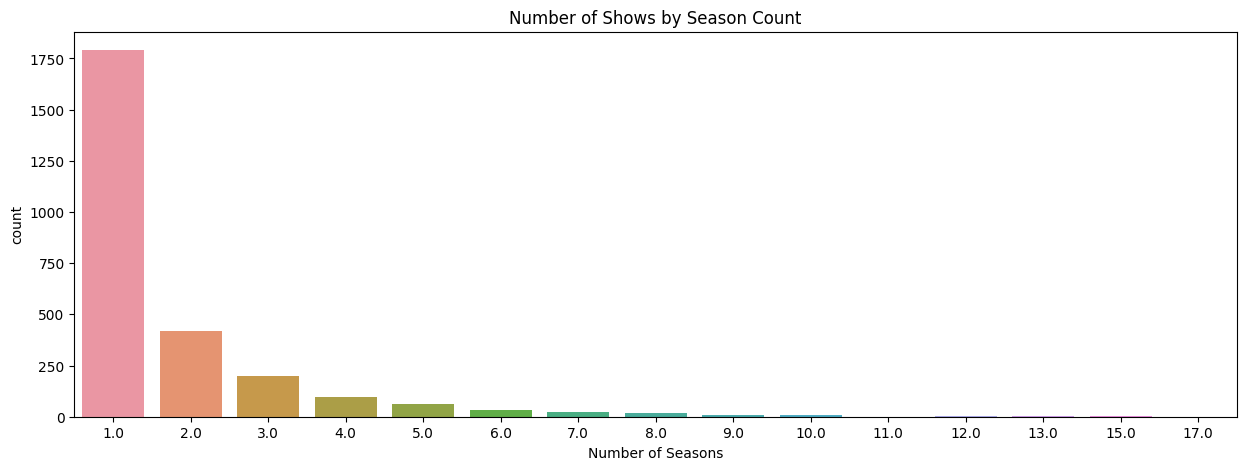


Avg TV Show Seasons:  2.0


In [15]:
shows = df[df['type'] == 'TV Show']
shows['season_count'] = shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(15, 5))
sns.countplot(data=shows, x='season_count')
plt.title('Number of Shows by Season Count')
plt.xlabel('Number of Seasons')
plt.show()

print("\nAvg TV Show Seasons: ", shows['season_count'].mean().round() )

8. Directors with most releases

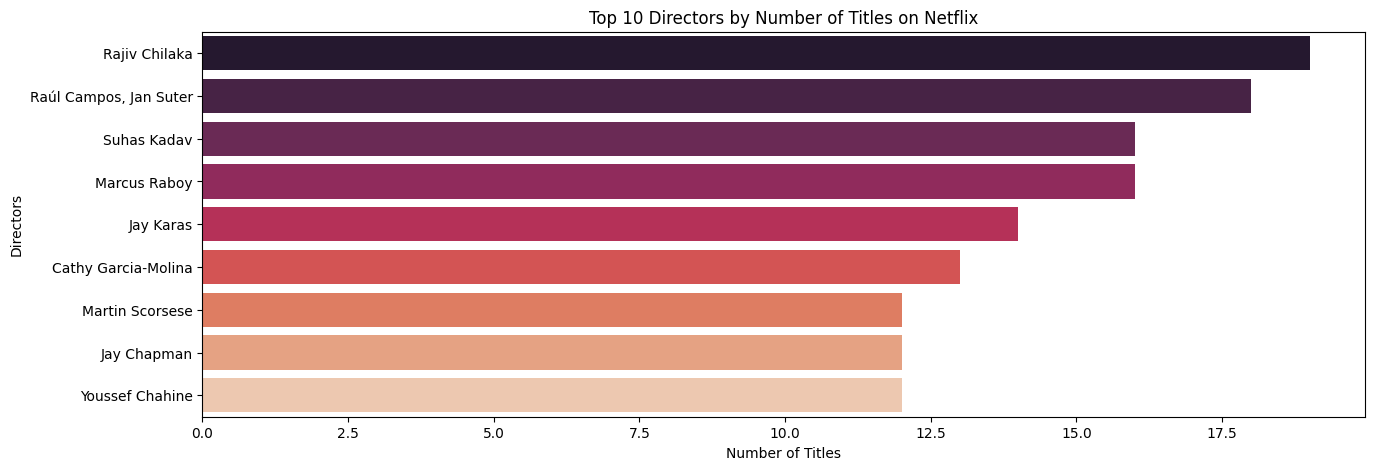

In [70]:
direct = df['director'].value_counts().head(10)
direct = direct[direct.index != 'Unknown']

plt.figure(figsize=(15, 5))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='rocket')
plt.title('Top 10 Directors by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()